In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/kaggle/input/stress/stress.csv")
print(df.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [2]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [3]:
df.shape

(2838, 116)

In [4]:
print(df.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


In [5]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["text"] = df["text"].apply(clean)

The nltk library is a powerful tool for working with human language data. It provides functions and datasets for tasks like tokenization, stemming, lemmatization, and stopword removal.
The re and string modules help handle text data by cleaning or removing unwanted characters or patterns.

u need to first dowload stopwords and then import it

then we set the stopwords to famous english stopwords. 

text = re.sub('https?://\S+|www\.\S+', '', text) this replaces https starting text with the second arguemnt which is the empty string and the 3rd argument is the variable thats getting updated.

text = [word for word in text.split(' ') if word not in stopword]
Purpose: Remove stopwords from the text.

text = " ".join(text)
Purpose: Join the words back together into a single string, separated by spaces.

Purpose: Apply the clean function to the "text" column of the data DataFrame.
Why: This line processes all rows in the data["text"] column by applying the clean function to each row's text.


The clean function is designed to:

Convert text to lowercase.
Remove unwanted characters such as URLs, HTML tags, punctuation, numbers, and stopwords.
Apply stemming to reduce words to their base forms.
Return the cleaned, processed text for further analysis.

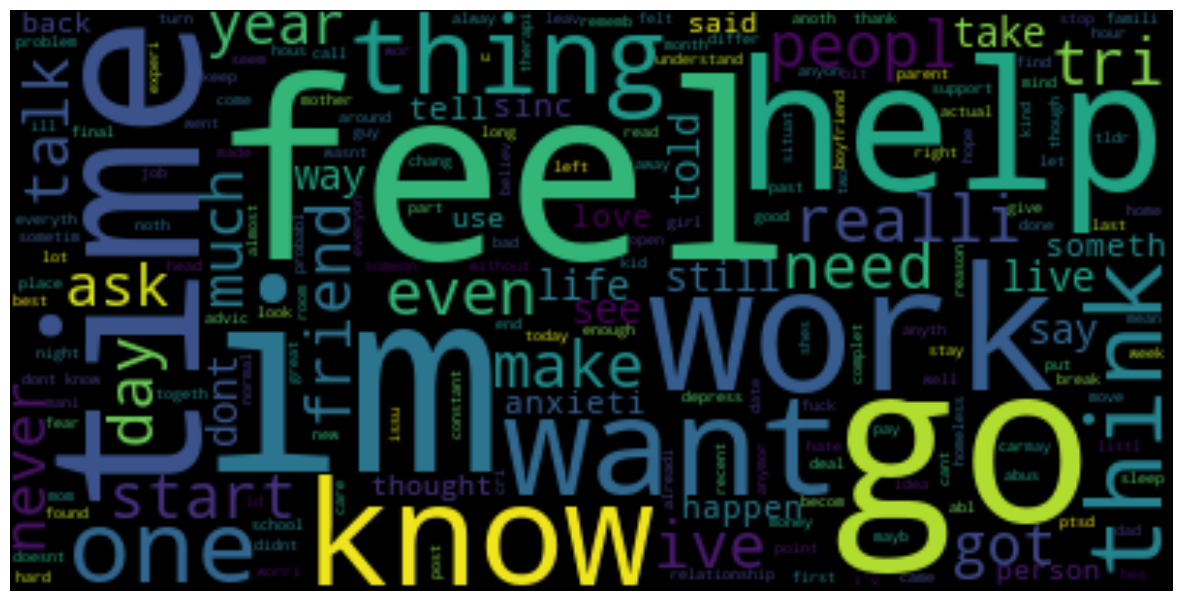

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

 A class from the wordcloud library used to generate word clouds, which are visual representations of text data with the most frequent words displayed in larger fonts.
 ImageColorGenerator: A utility in the wordcloud library to match word colors to an image’s palette

 text = " ".join(i for i in data.text)
 Purpose: Combines all the cleaned text into one large text body for word cloud generation.

stopwords = set(STOPWORDS)
STOPWORDS: A set of predefined stopwords from the wordcloud library.

Words that appear more frequently in the text are displayed larger in the word cloud.


plt.imshow(wordcloud): Displays the word cloud image in the figure.
interpolation='bilinear': Smoothens the appearance of the image, making it look more visually appealing.

In [7]:
df["label"] = df["label"].map({0: "No Stress", 1: "Stress"})
df = df[["text", "label"]]
print(df.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


in this we changed the size fo df to only text and label

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(df["text"])
y = np.array(df["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

countvectorizer breaks the words in the document then converts them into an array of separate words and then checks how many times the word appeares and converts the text into numerical form. its basically just encoding

Tokenizing the Text: Breaking down text into individual words (or n-grams).
Building a Vocabulary: Creating a dictionary of unique words found across all documents.
Assigning Indices: Each word in the vocabulary is assigned a unique index.
Generating a Document-Term Matrix: Creating a numerical matrix where:
Each row represents a document.
Each column represents a unique word (feature) in the vocabulary.
Each value represents the count of a word in the respective document.

then we split the dataset into train and test into 70 30

In [9]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

the one function model.fit trains the model. 

The fit method is a function provided by machine learning models in libraries like scikit-learn.
It trains the model using the training data by adjusting the model’s internal parameters to learn the underlying patterns in the dat

In [10]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test data
y_pred = model.predict(xtest)

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 74.71%


In [11]:
user = input("Enter a Text: ")
df = cv.transform([user]).toarray()
output = model.predict(df)
print(output)

Enter a Text:  im so sad today


['Stress']


data = cv.transform([user]).toarray()
What is happening here?
cv.transform([user]) is where the CountVectorizer (abbreviated as cv) turns the text you entered into numbers.

CountVectorizer is a tool that looks at each word in the text and counts how many times each word appears.

It does this by comparing your text to the list of words it has already learned from the training data (it was "fit" on the training data earlier).
For example, if the vocabulary learned by CountVectorizer is ["I", "am", "feeling", "stressed"], then the sentence "I am feeling stressed" would be turned into a set of counts for each word:
I: 1, am: 1, feeling: 1, stressed: 1
.toarray() converts the result into a 2D array format, where each row represents a sentence or document.

In this case, since we’re only entering one sentence, the result will be a 1x4 array:
lua
Copy code
[[1, 1, 1, 1]]
The 1s show how many times each word appears in the sentence, based on the vocabulary.
So now, instead of the words "I am feeling stressed", the computer sees a feature vector like this:

csharp
Copy code
[1, 1, 1, 1]
This is a numerical representation of the text, where each number corresponds to a word in the vocabulary.
3. Making a Prediction
python
Copy code
output = model.predict(data)
What happens here?
This line takes the feature vector (the numerical representation of your text) and sends it to the trained machine learning model (model).
The model looks at the numbers in the feature vector and tries to predict a category based on what it has learned during training.
For example, if your model was trained to classify text as "stress" (1) or "no stress" (0), it will use the feature vector to predict whether the input text is more likely to be "stress" or "no stress".
Based on the input sentence "I am feeling stressed", the model might output [1], meaning it predicts "stress".